# Data Augmentation



In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import tensorflow as tf
import os, sys
from IPython.display import display
from IPython.display import Image as _Imgdis
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np
from time import time
from time import sleep
import pandas as pd 

Working with 809 images
Image examples: 
bastiodon.png


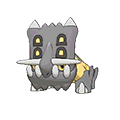

bayleef.png


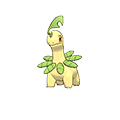

In [2]:
folder = "../numerical_examples/data/images/images"
onlyfiles = [f for f in os.listdir(folder) if os.path.isfile(os.path.join(folder, f))]
print("Working with {0} images".format(len(onlyfiles)))
print("Image examples: ")

for i in range(40, 42):
    print(onlyfiles[i])
    display(_Imgdis(filename=folder + "/" + onlyfiles[i], width=120, height=120))

In [3]:
from scipy import ndimage
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img

train_files = []
y_train = []
i=0
for _file in onlyfiles:
    train_files.append(_file)
    label_in_file = _file.find(".")
    y_train.append(str(_file[0:label_in_file]))
    
print("Files in train_files: %d" % len(train_files))

# Original Dimensions
image_width = 120
image_height = 120

channels = 3
nb_classes = 1

dataset = np.ndarray(shape=(len(train_files), image_height, image_width, channels),
                     dtype=np.float32)

i = 0
for _file in train_files:
    img = load_img(folder + "/" + _file)  # this is a PIL image
    img.thumbnail((image_width, image_height))
    # Convert to Numpy Array
    x = img_to_array(img)  
    x = x.reshape((120, 120, 3))
    # Normalize
    x = (x - 128.0) / 128.0
    dataset[i] = x
    i += 1
    if i % 250 == 0:
        print("%d images to array" % i)
print("All images to array!")

Using TensorFlow backend.


Files in train_files: 809


c:\users\moutz\desktop\pythonenv\venv\lib\site-packages\PIL\Image.py:989: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


250 images to array
500 images to array
750 images to array
All images to array!


In [4]:
y_train = np.array(y_train)
dataset.shape

(809, 120, 120, 3)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


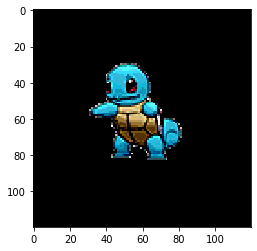

In [90]:
plt.figure()
plt.imshow(dataset[661,:,:,:])
plt.show()

## Zooming

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


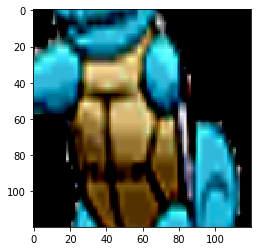

In [160]:
cropimg = tf.image.crop_and_resize(dataset[661,:,:,:].reshape([1,120,120,3]), boxes = [[0.4,0.3,0.6,0.7]] ,box_indices = [0] , crop_size = [120,120],method='bilinear',extrapolation_value=0)
plt.imshow(cropimg[0,:,:,:])

## Rotation

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


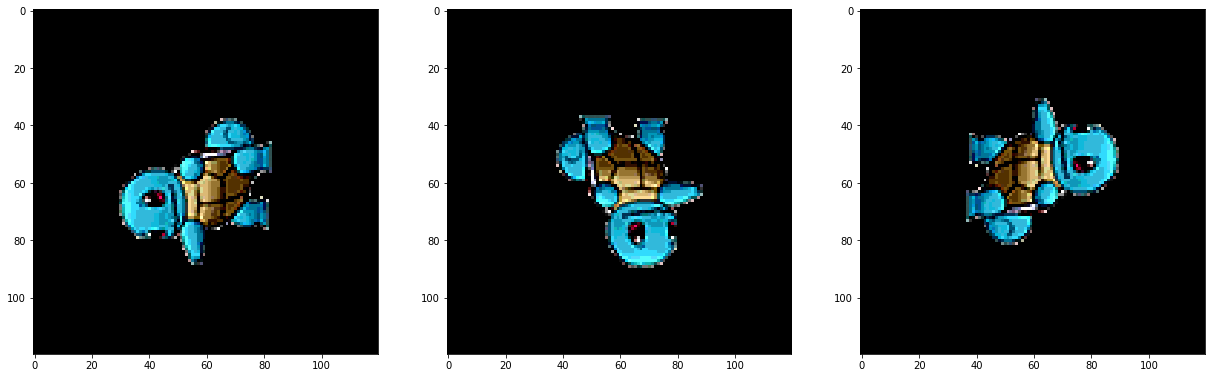

In [98]:
rotimg1 = tf.image.rot90(dataset[661,:,:,:],k=1)
rotimg2 = tf.image.rot90(dataset[661,:,:,:],k=2)
rotimg3 = tf.image.rot90(dataset[661,:,:,:],k=3)
plt.figure(figsize = (21,7))
plt.subplot(1, 3, 1)
plt.imshow(rotimg1)
plt.subplot(1, 3, 2)
plt.imshow(rotimg2)
plt.subplot(1, 3, 3)
plt.imshow(rotimg3)
plt.show()

## Flipping

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


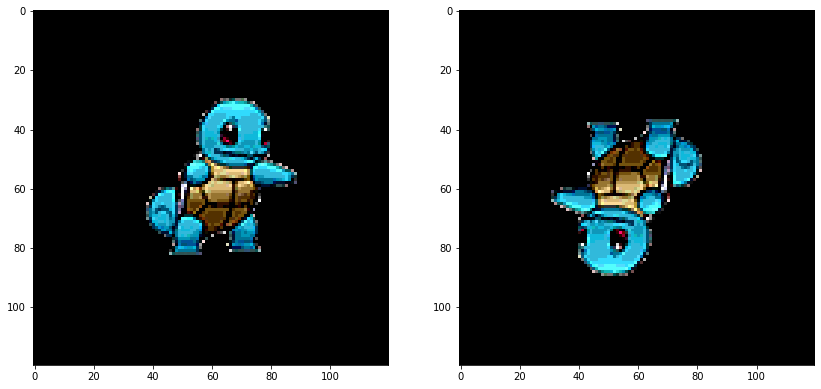

In [99]:
flippedimg1 = tf.image.flip_left_right(dataset[661,:,:,:])
flippedimg2 = tf.image.flip_up_down(dataset[661,:,:,:])
plt.figure(figsize = (14,7))
plt.subplot(1, 2, 1)
plt.imshow(flippedimg1)
plt.subplot(1, 2, 2)
plt.imshow(flippedimg2)
plt.show()

## Noise

In [88]:
def add_gaussian_noise(image):
    # image must be scaled in [0, 1]
    with tf.name_scope('Add_gaussian_noise'):
        noise = tf.random.normal(shape=tf.shape(image), mean=0.0, stddev=(50)/(255), dtype=tf.float32)
        noise_img = image + noise
        noise_img = tf.clip_by_value(noise_img, 0.0, 1.0)
    return(noise_img)

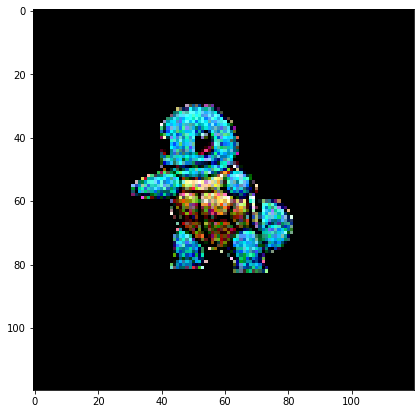

In [100]:
noisyimg = add_gaussian_noise(dataset[661,:,:,:])
plt.figure(figsize = (7,7))
plt.imshow(noisyimg)
plt.show()

## Color

### Brightness

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


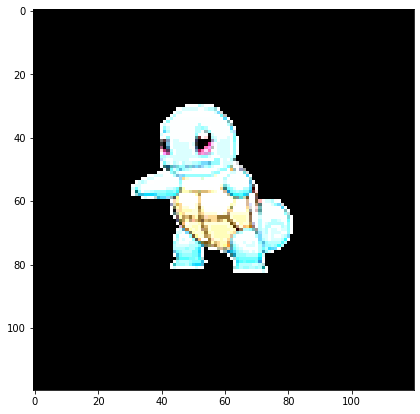

In [111]:
brightimg = tf.image.adjust_brightness(dataset[661,:,:,:],0.8)
plt.figure(figsize = (7,7))
plt.imshow(brightimg)
plt.show()

### Hue

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


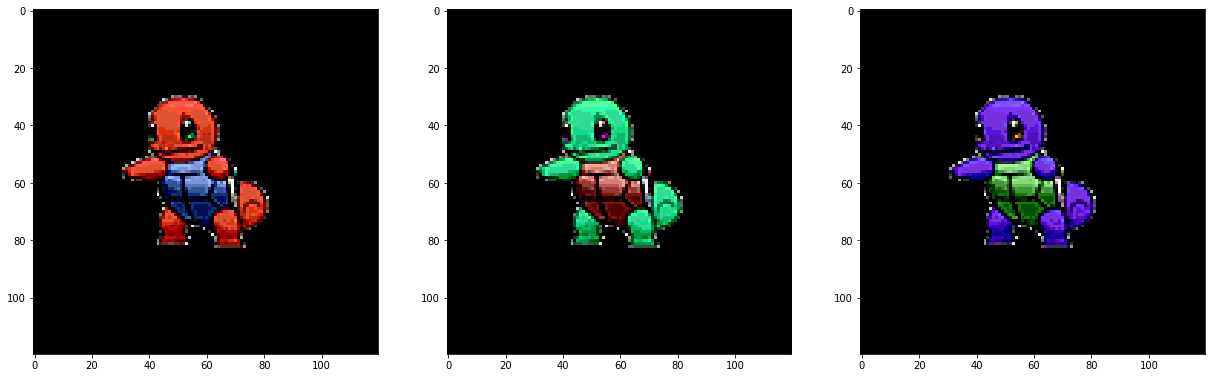

In [110]:
hueimg1 = tf.image.adjust_hue(dataset[661,:,:,:],0.5)
hueimg2 = tf.image.adjust_hue(dataset[661,:,:,:],0.9)
hueimg3 = tf.image.adjust_hue(dataset[661,:,:,:],0.2)
plt.figure(figsize = (21,7))
plt.subplot(1, 3, 1)
plt.imshow(hueimg1)
plt.subplot(1, 3, 2)
plt.imshow(hueimg2)
plt.subplot(1, 3, 3)
plt.imshow(hueimg3)
plt.show()

### Saturation

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


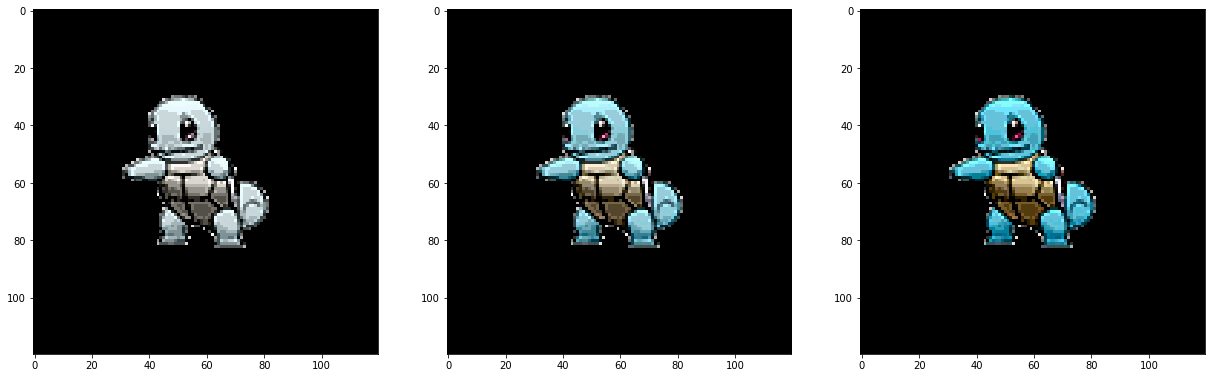

In [112]:
satimg1 = tf.image.adjust_saturation(dataset[661,:,:,:],0.1)
satimg2 = tf.image.adjust_saturation(dataset[661,:,:,:],0.4)
satimg3 = tf.image.adjust_saturation(dataset[661,:,:,:],0.7)
plt.figure(figsize = (21,7))
plt.subplot(1, 3, 1)
plt.imshow(satimg1)
plt.subplot(1, 3, 2)
plt.imshow(satimg2)
plt.subplot(1, 3, 3)
plt.imshow(satimg3)
plt.show()

### Gamma

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


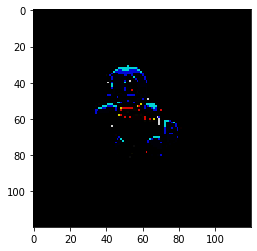

In [133]:
gammaimg = tf.image.adjust_gamma(dataset[661,:,:,:],gamma=23)
plt.imshow(gammaimg)

### Contrast

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


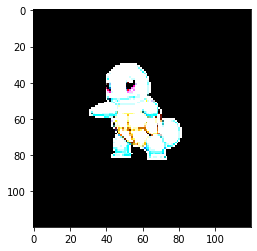

In [142]:
contimg = tf.image.adjust_contrast(dataset[661,:,:,:], 2.5)
plt.imshow(contimg)

## Augmentation

In [5]:

def flip(img: tf.Tensor) -> tf.Tensor:
    img = tf.image.random_flip_left_right(img)
    img = tf.image.random_flip_up_down(img)
    return(img)


def color(img: tf.Tensor) -> tf.Tensor:
    img = tf.image.random_hue(img, 0.08)
    img = tf.image.random_saturation(img, 0.6, 1.6)
    img = tf.image.random_brightness(img, 0.05)
    img = tf.image.random_contrast(img, 0.7, 1.3)
    return(img)

def rotate(img: tf.Tensor) -> tf.Tensor:
    n_rot = tf.random.uniform(shape=[], minval=0, maxval=4, dtype=tf.int32)
    return(tf.image.rot90(img,n_rot))


def zoom(img: tf.Tensor) -> tf.Tensor:
    scales = list(np.arange(0.8, 1.0, 0.01))
    boxes = np.zeros((len(scales), 4))
    for i, scale in enumerate(scales):
        x1 = y1 = 0.5 - (0.5 * scale)
        x2 = y2 = 0.5 + (0.5 * scale)
        boxes[i] = [x1, y1, x2, y2]
    def random_crop(img):
        crops = tf.image.crop_and_resize([img], boxes=boxes, box_indices=np.zeros(len(scales)), crop_size=(120, 120))
        return crops[tf.random.uniform(shape=[], minval=0, maxval=len(scales), dtype=tf.int32)]
    choice = tf.random.uniform(shape=[], minval=0., maxval=1., dtype=tf.float32)
    return tf.cond(choice < 0.5, lambda: img, lambda: random_crop(img))

dataset_tf = tf.data.Dataset.from_tensor_slices(dataset[0:10,:,:,:])

def augment(dataset):
    augmentations = [flip, color, zoom, rotate]
    for f in augmentations:
        dataset = dataset.map(f, num_parallel_calls=4)
    return(dataset)

dataset_tf = augment(dataset_tf)

In [6]:
def plot_images(dataset, n_images, samples_per_image):
    output = np.zeros((120 * n_images, 120 * samples_per_image, 3))

    row = 0
    for images in dataset.repeat(samples_per_image).batch(n_images):
        output[:, row*120:(row+1)*120] = np.vstack(images.numpy())
        row += 1

    plt.figure(figsize = (21,7))
    plt.imshow(output)
    plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


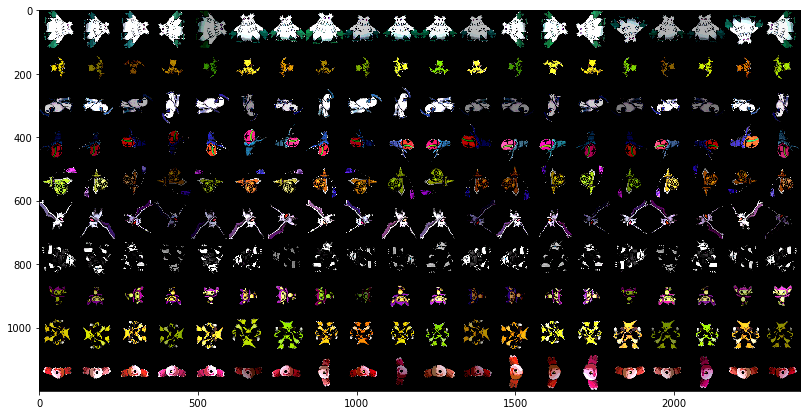

In [7]:
plot_images(dataset_tf,10,20)

## Training

In [8]:
data = pd.read_csv("../numerical_examples/data/pokemon.csv") 

In [9]:
train_labels = []
labels = []
for i in y_train:
    tmp = data.loc[data["Name"] == i, "Type1"].values[0]
    train_labels.append(tmp)
    if tmp not in labels:
        labels.append(tmp)
print(labels)
labels = np.array(labels)
train_labels = np.array(train_labels)
train_labels2 = np.zeros((train_labels.shape))
for i in range(train_labels.size):
    train_labels2[i] = np.where(labels == train_labels[i])[0]



['Grass', 'Psychic', 'Dark', 'Bug', 'Steel', 'Rock', 'Normal', 'Water', 'Dragon', 'Electric', 'Poison', 'Fire', 'Fairy', 'Ice', 'Ground', 'Ghost', 'Fighting', 'Flying']


In [10]:
from tensorflow.keras import layers, models, callbacks
from tensorflow.keras.utils import to_categorical

response = train_labels2
dataset_tf = tf.data.Dataset.from_tensor_slices(dataset)
dataset_tf = augment(dataset_tf)
features = np.zeros((809,120,120,3))
count = 0
for img in dataset_tf:
    features[count,:,:,:] = img
    count+=1

In [11]:
def create_cnn():
    model = models.Sequential()
    model.add(layers.Conv2D(filters = 32, kernel_size = (3,3), activation  = 'relu', input_shape = (120, 120,3)))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(64, (3, 3), activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(64, (3, 3), activation='relu'))
    model.add(layers.Flatten())
    model.add(layers.Dense(128, activation='relu'))
    model.add(layers.Dense(18,activation = 'softmax'))
    model.compile(
        optimizer='adam',
        loss='sparse_categorical_crossentropy',
        metrics=['accuracy']
    )
    return(model)


In [12]:
response.shape

(809,)

In [13]:
model = create_cnn()
history = model.fit(features, 
          response, 
          epochs=20,
          validation_split = 0.2
         )

Train on 647 samples, validate on 162 samples
Epoch 1/20
647/647 [==============================] - 8s 12ms/sample - loss: 3.0653 - accuracy: 0.1082 - val_loss: 2.7235 - val_accuracy: 0.1667
Epoch 2/20
647/647 [==============================] - 7s 11ms/sample - loss: 2.7274 - accuracy: 0.1422 - val_loss: 2.7133 - val_accuracy: 0.1296
Epoch 3/20
647/647 [==============================] - 7s 11ms/sample - loss: 2.6710 - accuracy: 0.1329 - val_loss: 2.6857 - val_accuracy: 0.1852
Epoch 4/20
647/647 [==============================] - 7s 11ms/sample - loss: 2.5486 - accuracy: 0.2040 - val_loss: 2.6386 - val_accuracy: 0.2037
Epoch 5/20
647/647 [==============================] - 7s 11ms/sample - loss: 2.3025 - accuracy: 0.2736 - val_loss: 2.7235 - val_accuracy: 0.2284
Epoch 6/20
647/647 [==============================] - 7s 11ms/sample - loss: 1.9114 - accuracy: 0.4127 - val_loss: 2.9864 - val_accuracy: 0.1728
Epoch 7/20
647/647 [==============================] - 7s 11ms/sample - loss: 1.3882 